Bernstein Vazarani algo proof, applying notes to code with Qiskit
Code flow: 1 qubit for each bit in string + 1 extra (to create phase)
    Extra qubit prepared to be an eigenstate of X (to make phase kickback happen)
    Target = Phase_bit, Control = each input qubit

    Phase_bit starts with ket 0. Then after X it becomes ket 1. Then after H it become ket - (THIS IS WHEN phase_bit is an eigenstate of X)
    
Indepth info: 
    Oracle(black box fn) purpose - for each input x it applies a + or -1 
    Only 1 query vs n queries for classical!

Miscl:
    CZ method (like phase_kickback.ipynb) can be used for BV algo also. It doesn't require an ancilla. Use when comfortable with phase kickback

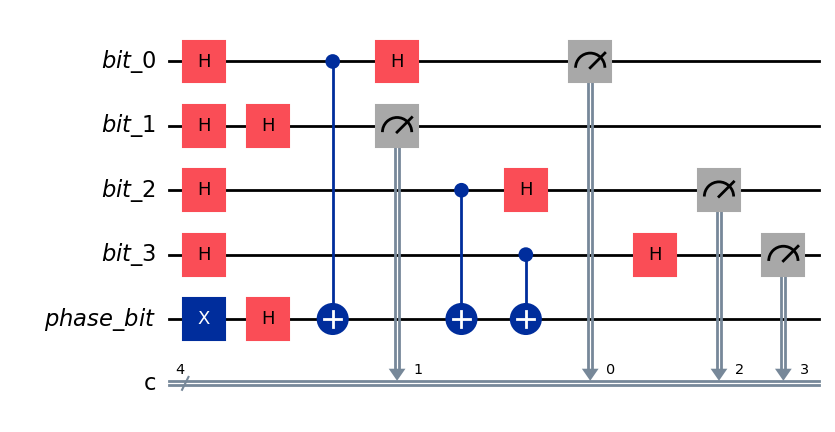

In [ ]:
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister
from qiskit_aer import AerSimulator

secret = "1011" #the secret string we are trying to find
n = len(secret)

#4 bit system
bit_0 = QuantumRegister(1, 'bit_0')
bit_1 = QuantumRegister(1, 'bit_1')
bit_2 = QuantumRegister(1, 'bit_2')
bit_3 = QuantumRegister(1, 'bit_3')
qc = QuantumCircuit(bit_0, bit_1, bit_2, bit_3)
phase_bit = QuantumRegister(1, 'phase_bit') #for the oracle to write info onto, needed for phase kickback (right now its a 0)
qc.add_register(phase_bit)
c = ClassicalRegister(4, 'c')
qc.add_register(c)
qc.h(bit_0)
qc.h(bit_1)
qc.h(bit_2)
qc.h(bit_3)
qc.draw('mpl') #four bits put into superposition
qc.x(phase_bit) 
qc.h(phase_bit)  #now phase bit is in ket minus state meaning its an eigenstate of X, phase kickback activated
qc.draw('mpl') #all ket plus states with phase bit in ket minus state
##cnot if bit is 1, phase bit gets flipped, if 0 nothing happens
#meaning each input qubit with secret bit 1 is connected to phase bit with a CNOT 
if secret[0] == "1":
    qc.cx(bit_0, phase_bit)
if secret[1] == "1":
    qc.cx(bit_1, phase_bit)
if secret[2] == "1":
    qc.cx(bit_2, phase_bit)
if secret[3] == "1":
    qc.cx(bit_3, phase_bit)
qc.h(bit_0) #end superposition
qc.h(bit_1)
qc.h(bit_2)
qc.h(bit_3)
#do not touch the phase bit, it is not measured
qc.measure(bit_0, c[0])
qc.measure(bit_1, c[1])
qc.measure(bit_2, c[2])
qc.measure(bit_3, c[3])
qc.draw('mpl') #final circuit

In [ ]:
sim = AerSimulator()
job = sim.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

print(f"secret is {counts}") #qiksit prints in little endian so the string is reversed


secret is {'1101': 1024}
